In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=c91976a28bdca4dd1311b2bede636c2fecf84817be6798117111683c1d1fd365
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [2]:
from deepface import DeepFace

24-08-21 18:00:27 - Directory /root/.deepface has been created
24-08-21 18:00:27 - Directory /root/.deepface/weights has been created


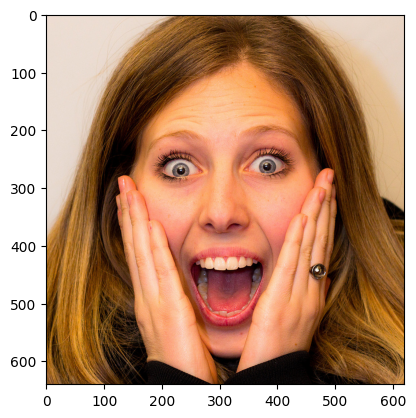

In [3]:
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('/content/facial-expression-surprise.jpg')
plt.imshow(img1[:,:,::-1])
plt.show()

In [4]:
result = DeepFace.analyze(img1,actions=['emotion'])

24-08-21 18:06:31 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 53.7MB/s]


In [5]:
print(result)

[{'emotion': {'angry': 0.008663718894630653, 'disgust': 1.1174647547719636e-09, 'fear': 0.019316618880231663, 'happy': 28.805735253604023, 'sad': 0.015059587554887675, 'surprise': 71.12947450524872, 'neutral': 0.021744557625331565}, 'dominant_emotion': 'surprise', 'region': {'x': 94, 'y': 99, 'w': 426, 'h': 426, 'left_eye': (383, 258), 'right_eye': (225, 264)}, 'face_confidence': 0.91}]


In [6]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [7]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [26]:
image_file = take_photo()

<IPython.core.display.Javascript object>

400 300


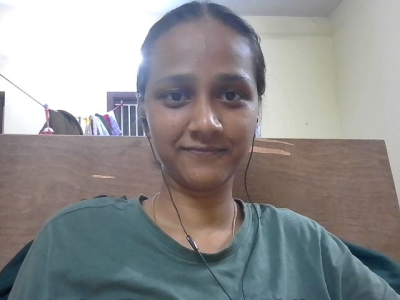

In [27]:
image = cv2.imread(image_file)
image = imutils.resize(image,width=400)
(h,w)=image.shape[:2]
print(w,h)
cv2_imshow(image)

In [28]:
result=DeepFace.analyze(image,actions=['emotion'])

In [29]:
print(result)

[{'emotion': {'angry': 0.0388080504186735, 'disgust': 7.996198435150946e-07, 'fear': 0.04960090746070832, 'happy': 46.13959743256538, 'sad': 0.2585553173861286, 'surprise': 0.4706119748189419, 'neutral': 53.04282939944618}, 'dominant_emotion': 'neutral', 'region': {'x': 128, 'y': 38, 'w': 151, 'h': 151, 'left_eye': (229, 95), 'right_eye': (175, 95)}, 'face_confidence': 0.95}]
